<h2>READ TENSORS<h2>

In [1]:
import tensorflow as tf
import numpy as np
import os
import pandas as pd
import pickle
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
from statistics import mean
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from torch import optim
from torch import nn
import itertools
import torch.nn.functional as F

from tensorflow import keras
import random
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras import optimizers
from torch.utils.data import random_split
import time
from sklearn.model_selection import KFold

In [2]:
temperature_tensor = torch.load('temperature_tensor_v1.pt')
height_tensor = torch.load('height_tensor_v1.pt')

<h2>Data Normalization<h2>

In [3]:
# normalized_temperatures = temperature_tensor.numpy()
# normalized_heights = height_tensor.numpy()

# normalized_t = []
# for temperature in normalized_temperatures:
#     norm = [float(i)/sum(temperature[0]) for i in temperature[0]]
#     normalized_t.append([norm])
# normalized_t = np.array(normalized_t)
# normalized_t_tensor = torch.from_numpy(normalized_t).float()
    
# normalized_h = []
# for height in normalized_heights:
#     norm = [float(i)/sum(height[0]) for i in height[0]]
#     normalized_h.append([norm])
# normalized_h = np.array(normalized_h)
# normalized_h_tensor = torch.from_numpy(normalized_h).float()

In [4]:
t_mean = temperature_tensor.mean()
t_std = temperature_tensor.std()

normalized_t_tensor = ((temperature_tensor - t_mean)/t_std)[:,0:1,:].float()

h_mean = temperature_tensor.mean()
h_std = temperature_tensor.std()

normalized_h_tensor = ((temperature_tensor - t_mean)/t_std)[:,0:1,:].float()


2.697111e-08
0.9999998


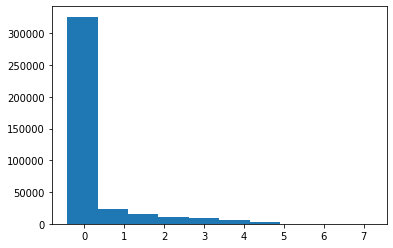

In [5]:
data = normalized_h_tensor.numpy()

plt.hist(data.flatten())
print(data.mean())
print(data.std())

<h2>CNN<h2>

In [6]:
num_epochs = 60
learning_rate = 0.001

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv1d(1, 60, kernel_size=19, stride=1, padding=9),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv1d(60, 1, kernel_size=19, stride=1, padding=9),
            # nn.ReLU()
        )

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer4(out)
        return out  

In [7]:
model = ConvNet() 
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [8]:
print(normalized_t_tensor.squeeze())

tensor([[-0.4333, -0.4333, -0.4333,  ..., -0.4333, -0.4333, -0.4333],
        [-0.4333, -0.4333, -0.4333,  ..., -0.4333, -0.4333, -0.4333],
        [-0.4333, -0.4333, -0.4333,  ..., -0.4333, -0.4333, -0.4333],
        ...,
        [-0.4333, -0.4333, -0.4333,  ..., -0.4333, -0.4333, -0.4333],
        [-0.4333, -0.4333, -0.4333,  ..., -0.4333, -0.4333, -0.4333],
        [-0.4333, -0.4333, -0.4333,  ..., -0.4333, -0.4333, -0.4333]])


In [9]:
print(normalized_h_tensor.shape)

torch.Size([1959, 1, 201])


In [10]:
losses = []

for epoch in tqdm(range(num_epochs)):
    outputs = model(normalized_t_tensor)
    loss = criterion(outputs, normalized_h_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.data.numpy())
    print(loss.data.numpy())

  2%|█▍                                                                                 | 1/60 [00:03<03:08,  3.19s/it]

2.1104813


  3%|██▊                                                                                | 2/60 [00:06<02:58,  3.07s/it]

1.475706


  5%|████▏                                                                              | 3/60 [00:08<02:29,  2.62s/it]

0.96795756


  7%|█████▌                                                                             | 4/60 [00:10<02:07,  2.28s/it]

0.581953


  8%|██████▉                                                                            | 5/60 [00:11<01:51,  2.03s/it]

0.31283036


 10%|████████▎                                                                          | 6/60 [00:13<01:44,  1.93s/it]

0.15405238


 12%|█████████▋                                                                         | 7/60 [00:16<02:02,  2.31s/it]

0.09392543


 13%|███████████                                                                        | 8/60 [00:18<01:52,  2.16s/it]

0.110901654


 15%|████████████▍                                                                      | 9/60 [00:20<01:45,  2.07s/it]

0.17126584


 17%|█████████████▋                                                                    | 10/60 [00:22<01:41,  2.03s/it]

0.23646946


 18%|███████████████                                                                   | 11/60 [00:23<01:35,  1.95s/it]

0.2779653


 20%|████████████████▍                                                                 | 12/60 [00:26<01:46,  2.22s/it]

0.28458545


 22%|█████████████████▊                                                                | 13/60 [00:28<01:37,  2.08s/it]

0.25934502


 23%|███████████████████▏                                                              | 14/60 [00:30<01:29,  1.95s/it]

0.21278447


 25%|████████████████████▌                                                             | 15/60 [00:31<01:21,  1.80s/it]

0.15735447


 27%|█████████████████████▊                                                            | 16/60 [00:33<01:16,  1.73s/it]

0.103939764


 28%|███████████████████████▏                                                          | 17/60 [00:34<01:10,  1.64s/it]

0.06047444


 30%|████████████████████████▌                                                         | 18/60 [00:36<01:10,  1.69s/it]

0.031045506


 32%|█████████████████████████▉                                                        | 19/60 [00:37<01:05,  1.61s/it]

0.01626581


 33%|███████████████████████████▎                                                      | 20/60 [00:39<01:02,  1.56s/it]

0.014236654


 35%|████████████████████████████▋                                                     | 21/60 [00:40<01:00,  1.54s/it]

0.021416128


 37%|██████████████████████████████                                                    | 22/60 [00:42<00:56,  1.50s/it]

0.033553302


 38%|███████████████████████████████▍                                                  | 23/60 [00:43<00:55,  1.50s/it]

0.046513643


 40%|████████████████████████████████▊                                                 | 24/60 [00:45<00:54,  1.51s/it]

0.057098344


 42%|██████████████████████████████████▏                                               | 25/60 [00:46<00:52,  1.51s/it]

0.06330515


 43%|███████████████████████████████████▌                                              | 26/60 [00:48<00:51,  1.50s/it]

0.06441659


 45%|████████████████████████████████████▉                                             | 27/60 [00:49<00:49,  1.49s/it]

0.06082134


 47%|██████████████████████████████████████▎                                           | 28/60 [00:51<00:47,  1.49s/it]

0.053634897


 48%|███████████████████████████████████████▋                                          | 29/60 [00:52<00:46,  1.50s/it]

0.044336263


 50%|█████████████████████████████████████████                                         | 30/60 [00:54<00:45,  1.51s/it]

0.03445426


 52%|██████████████████████████████████████████▎                                       | 31/60 [00:56<00:48,  1.67s/it]

0.025332028


 53%|███████████████████████████████████████████▋                                      | 32/60 [00:58<00:53,  1.90s/it]

0.017968573


 55%|█████████████████████████████████████████████                                     | 33/60 [01:00<00:49,  1.84s/it]

0.012936449


 57%|██████████████████████████████████████████████▍                                   | 34/60 [01:02<00:54,  2.08s/it]

0.010361278


 58%|███████████████████████████████████████████████▊                                  | 35/60 [01:06<00:59,  2.39s/it]

0.0099549685


 60%|█████████████████████████████████████████████████▏                                | 36/60 [01:08<01:00,  2.53s/it]

0.011123642


 62%|██████████████████████████████████████████████████▌                               | 37/60 [01:11<00:58,  2.53s/it]

0.013097268


 63%|███████████████████████████████████████████████████▉                              | 38/60 [01:13<00:53,  2.42s/it]

0.01508976


 65%|█████████████████████████████████████████████████████▎                            | 39/60 [01:15<00:45,  2.17s/it]

0.01645653


 67%|██████████████████████████████████████████████████████▋                           | 40/60 [01:17<00:43,  2.16s/it]

0.016808622


 68%|████████████████████████████████████████████████████████                          | 41/60 [01:19<00:38,  2.05s/it]

0.01605512


 70%|█████████████████████████████████████████████████████████▍                        | 42/60 [01:20<00:33,  1.86s/it]

0.014375787


 72%|██████████████████████████████████████████████████████████▊                       | 43/60 [01:22<00:30,  1.78s/it]

0.012135746


 73%|████████████████████████████████████████████████████████████▏                     | 44/60 [01:23<00:27,  1.70s/it]

0.009775203


 75%|█████████████████████████████████████████████████████████████▌                    | 45/60 [01:25<00:25,  1.70s/it]

0.0076983967


 77%|██████████████████████████████████████████████████████████████▊                   | 46/60 [01:26<00:23,  1.65s/it]

0.0061895987


 78%|████████████████████████████████████████████████████████████████▏                 | 47/60 [01:28<00:21,  1.63s/it]

0.005370024


 80%|█████████████████████████████████████████████████████████████████▌                | 48/60 [01:30<00:19,  1.62s/it]

0.005199293


 82%|██████████████████████████████████████████████████████████████████▉               | 49/60 [01:31<00:17,  1.60s/it]

0.005513317


 83%|████████████████████████████████████████████████████████████████████▎             | 50/60 [01:33<00:16,  1.64s/it]

0.006082436


 85%|█████████████████████████████████████████████████████████████████████▋            | 51/60 [01:34<00:14,  1.62s/it]

0.006672527


 87%|███████████████████████████████████████████████████████████████████████           | 52/60 [01:36<00:12,  1.62s/it]

0.007094291


 88%|████████████████████████████████████████████████████████████████████████▍         | 53/60 [01:38<00:11,  1.65s/it]

0.007233086


 90%|█████████████████████████████████████████████████████████████████████████▊        | 54/60 [01:39<00:09,  1.61s/it]

0.0070560374


 92%|███████████████████████████████████████████████████████████████████████████▏      | 55/60 [01:41<00:07,  1.58s/it]

0.0066036535


 93%|████████████████████████████████████████████████████████████████████████████▌     | 56/60 [01:42<00:06,  1.58s/it]

0.005966403


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 57/60 [01:44<00:04,  1.56s/it]

0.005257793


 97%|███████████████████████████████████████████████████████████████████████████████▎  | 58/60 [01:45<00:03,  1.56s/it]

0.004590422


 98%|████████████████████████████████████████████████████████████████████████████████▋ | 59/60 [01:47<00:01,  1.55s/it]

0.00405498


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [01:49<00:00,  1.82s/it]

0.0037067672


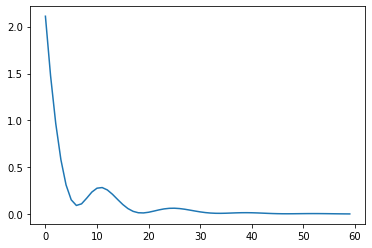

In [11]:
plt.plot(losses)
plt.show()

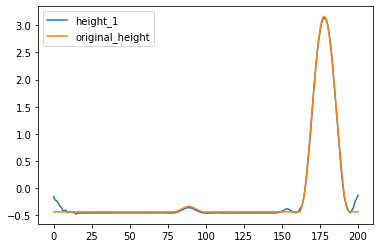

In [12]:
temp = 200

output_1 = model(normalized_t_tensor[temp])
output_1 = output_1.detach().numpy()
plt.plot(output_1[0], label = 'height_1')

# output_2 = model(normalized_t_tensor[250])
# output_2 = output_2.detach().numpy()
# plt.plot(output_2[0], label = 'height_2')

h = normalized_h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

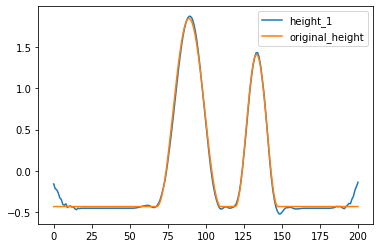

In [13]:
temp = 400

output_1 = model(normalized_t_tensor[temp])
output_1 = output_1.detach().numpy()
plt.plot(output_1[0], label = 'height_1')

# output_2 = model(normalized_t_tensor[250])
# output_2 = output_2.detach().numpy()
# plt.plot(output_2[0], label = 'height_2')
# plt.show()

h = normalized_h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

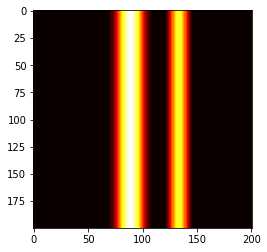

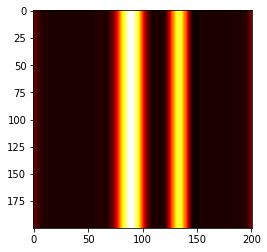

In [14]:
h_pred = np.tile(output_1[0], (200, 1))
h_orig = np.tile(h[0], (200, 1))

plt.imshow(h_orig, cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(h_pred, cmap='hot', interpolation='nearest')
plt.show();

<h2>Test, Train, Validation Split<h2>

In [15]:
seed = 10
np.random.seed(seed)

In [16]:
seed = 7
np.random.seed(seed)
X_train, X_test, Y_train, Y_test = train_test_split(normalized_t_tensor, normalized_h_tensor, test_size=0.2, random_state=seed, shuffle = True)

In [17]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=seed, shuffle = True)
trainSteps = len(X_train)
valSteps = len(X_val)

In [18]:
H = {
    "train_loss": [],
    "train_acc": [],
    "val_loss": [],
    "val_acc": []
}

In [19]:
# for (x, y) in zip(X_train[0], Y_train[0]):
#     print(x)
#     print(y)
#     break

In [20]:
model = ConvNet() 
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [21]:
#LOSS FOR EACH EPOCH
num_epochs = 1

valLoss = []
trainLoss = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("[INFO] training the network...")
startTime = time.time()

for epoch in tqdm(range(num_epochs)):

    model.train()

    totalTrainLoss = 0
    totalValLoss = 0
    

    for (i,(x, y)) in enumerate(zip(X_train[0:100], Y_train[0:100])):
        (x, y) = (x.to(device), y.to(device))
        pred = model(x)     
        loss = criterion(pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()        
        totalTrainLoss += loss
        
        if (i % 10 == 0): 
            print(i)
            trainLoss.append(totalTrainLoss/10.0)
            totalTrainLoss = 0
            
            with torch.no_grad():
                model.eval()

                for(x, y) in zip(X_val, Y_val):
                    (x, y) = (x.to(device), y.to(device))
                    pred = model(x)
                    totalValLoss += criterion(pred, y)

            avgValLoss = totalValLoss/valSteps

            valLoss.append(avgValLoss)
            totalValLoss = 0
                    
    avgTrainLoss = totalTrainLoss/trainSteps
    
    H['train_loss'].append(avgTrainLoss.cpu().detach().numpy())
    H['val_loss'].append(avgValLoss.cpu().detach().numpy())
    
    print("[INFO] EPOCH: {}/{}".format(epoch + 1, num_epochs))
    print("Train loss: {:.6f}\n".format(avgTrainLoss))
    print("Val loss: {:.6f}\n".format(avgValLoss))
    
endTime = time.time()
print("[INFO] total time taken to train the model: {:.2f}s".format(endTime - startTime))

[INFO] training the network...


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0
10
20
30
40
50
60
70
80
90


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.63s/it]

[INFO] EPOCH: 1/1
Train loss: 0.000016

Val loss: 0.002776

[INFO] total time taken to train the model: 1.64s


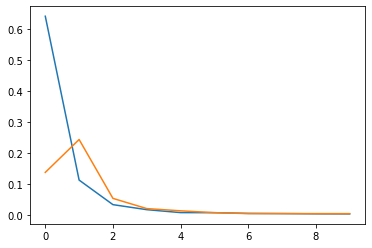

In [22]:
# print(valLoss)
plt.plot(valLoss)
plt.plot(torch.tensor(trainLoss).detach())
plt.show()

In [23]:
model = ConvNet() 
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [24]:
num_epochs = 10

valLoss = []
trainLoss = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("[INFO] training the network...")
startTime = time.time()

for epoch in tqdm(range(num_epochs)):

    model.train()

    totalTrainLoss = 0
    totalValLoss = 0    

    for (x, y) in zip(X_train, Y_train):
        (x, y) = (x.to(device), y.to(device))
        pred = model(x)     
        loss = criterion(pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()        
        totalTrainLoss += loss
            
    with torch.no_grad():
        model.eval()

        for(x, y) in zip(X_val, Y_val):
            (x, y) = (x.to(device), y.to(device))
            pred = model(x)
            totalValLoss += criterion(pred, y)
                    
    avgTrainLoss = totalTrainLoss/trainSteps
    avgValLoss = totalValLoss/valSteps
    
    H['train_loss'].append(avgTrainLoss.cpu().detach().numpy())
    H['val_loss'].append(avgValLoss.cpu().detach().numpy())
    
    print("[INFO] EPOCH: {}/{}".format(epoch + 1, num_epochs))
    print("Train loss: {:.6f}\n".format(avgTrainLoss))
    print("Val loss: {:.6f}\n".format(avgValLoss))
    
endTime = time.time()
print("[INFO] total time taken to train the model: {:.2f}s".format(endTime - startTime))

[INFO] training the network...


 10%|████████▎                                                                          | 1/10 [00:02<00:19,  2.21s/it]

[INFO] EPOCH: 1/10
Train loss: 0.006097

Val loss: 0.000135



 20%|████████████████▌                                                                  | 2/10 [00:04<00:17,  2.21s/it]

[INFO] EPOCH: 2/10
Train loss: 0.001123

Val loss: 0.000047



 30%|████████████████████████▉                                                          | 3/10 [00:06<00:15,  2.17s/it]

[INFO] EPOCH: 3/10
Train loss: 0.000411

Val loss: 0.000042



 40%|█████████████████████████████████▏                                                 | 4/10 [00:08<00:13,  2.18s/it]

[INFO] EPOCH: 4/10
Train loss: 0.000693

Val loss: 0.000032



 50%|█████████████████████████████████████████▌                                         | 5/10 [00:11<00:11,  2.21s/it]

[INFO] EPOCH: 5/10
Train loss: 0.000539

Val loss: 0.000042



 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:13<00:08,  2.19s/it]

[INFO] EPOCH: 6/10
Train loss: 0.000233

Val loss: 0.000053



 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:15<00:06,  2.20s/it]

[INFO] EPOCH: 7/10
Train loss: 0.000527

Val loss: 0.000040



 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:17<00:04,  2.22s/it]

[INFO] EPOCH: 8/10
Train loss: 0.000233

Val loss: 0.000029



 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:19<00:02,  2.21s/it]

[INFO] EPOCH: 9/10
Train loss: 0.000175

Val loss: 0.000036



100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:22<00:00,  2.20s/it]

[INFO] EPOCH: 10/10
Train loss: 0.000581

Val loss: 0.000033

[INFO] total time taken to train the model: 22.02s


In [25]:
# print("[INFO] evaluating network...")
test_loss = []

with torch.no_grad():
    model.eval()
    for (x, y) in zip(X_test, Y_test):
        x = x.to(device)
        pred = model(x)
        loss = criterion(pred, y)
        test_loss.append(loss)
        

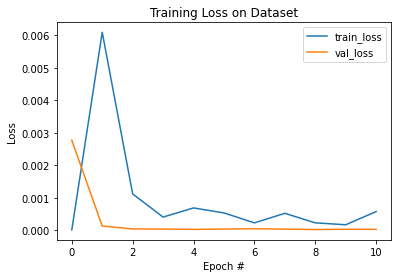

In [26]:
plt.plot(H["train_loss"], label="train_loss")
plt.plot(H["val_loss"], label="val_loss")
# plt.plot(test_loss, label="test_loss")
plt.title("Training Loss on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc = "upper right")
plt.show()

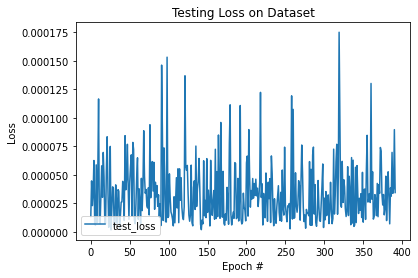

In [27]:
plt.plot(test_loss, label="test_loss")
plt.title("Testing Loss on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc = "lower left")
plt.show()

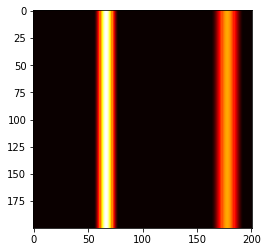

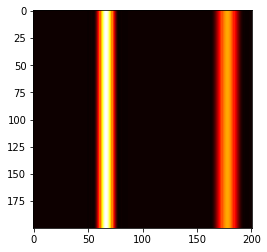

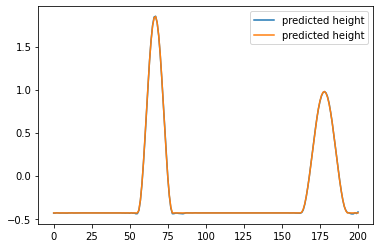

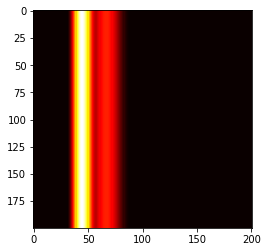

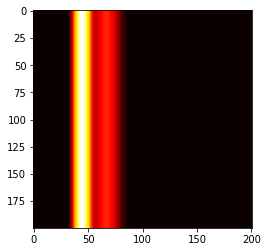

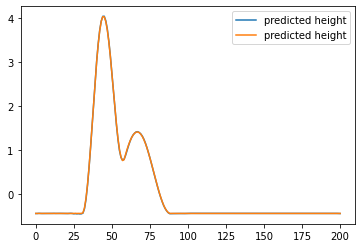

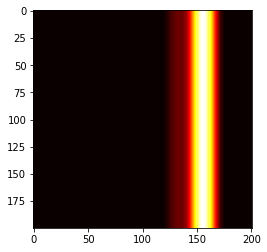

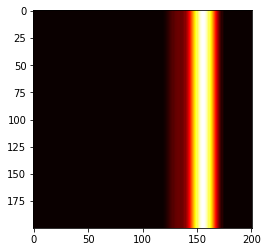

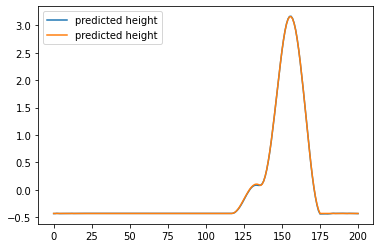

In [28]:
count = 0

for (x, y) in zip(X_test, Y_test):
    
    x = x.to(device)
    pred = model(x)
    
        
    pred = pred.detach().numpy()
    y = y.detach().numpy()
    
    h_pred = np.tile(pred, (200, 1))
    h_orig = np.tile(y, (200, 1))

    plt.imshow(h_orig, cmap='hot', interpolation='nearest')
    plt.show()
    plt.imshow(h_pred, cmap='hot', interpolation='nearest')
    plt.show()
    
    # print(pred[0])
    # print(y[0])
    
    plt.plot(pred[0], label = 'predicted height')
    plt.plot(y[0], label = 'predicted height')
    plt.legend()
    plt.show()
    
    count += 1
    if(count==3):    
        break

<h2>Cross Validation<h2>

In [ ]:
X_train = normalized_t_tensor
Y_train = normalized_h_tensor

print(X_train.shape)
kf = KFold(n_splits=10)

In [ ]:
plt.plot(pred[0], label = 'predicted height')

In [ ]:
def network_train(network, epochs, save_Model = False):
    losses = []
    for fold, (train_index, test_index) in enumerate(kf.split(X_train, Y_train)):
        # print(len(train_index), len(test_index))
        # print(train_index)
        ### Dividing data into folds
        
        x_train_fold = []
        for i in train_index:
            x_train_fold.append(X_train[i])
        x_train_fold = torch.Tensor(np.array(x_train_fold))
        
        x_test_fold = []
        for i in test_index:
            x_test_fold.append(X_train[i])
        x_test_fold = torch.Tensor(x_test_fold)
        
        y_train_fold = []
        for i in train_index:
            y_train_fold.append(Y_train[i])
        y_train_fold = torch.Tensor(y_train_fold)
        
        y_test_fold = []
        for i in test_index:
            y_test_fold.append(Y_train[i])
        y_test_fold = torch.Tensor(y_test_fold)
            
        print(type(x_train_fold))

        # train = torch.utils.data.TensorDataset(x_train_fold, y_train_fold)
        # test = torch.utils.data.TensorDataset(x_test_fold, y_test_fold)
        # train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = True)
        # test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = True)
        
#         trainSteps = len(x_train_fold)

#         for epoch in tqdm(range(epochs)):
#             total_loss = 0
#             print('\nEpoch {} / {} \nFold number {} / {}'.format(epoch + 1, epochs, fold + 1 , kfold.get_n_splits()))
#             # correct = 0
#             network.train()
#             for batch_index, (x_batch, y_batch) in enumerate(train_loader):
#                 optimizer.zero_grad()
#                 out = network(x_batch)
#                 loss = criterion(out, y_batch)
#                 loss.backward()
#                 optimizer.step()
#                 total_loss += loss
#                 # pred = torch.max(out.data, dim=1)[1]
#                 # correct += (pred == y_batch).sum()
#                 if (batch_index + 1) % 32 == 0:
#                     print('[{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Accuracy:{:.3f}%'.format(
#                         (batch_index + 1)*len(x_batch), len(train_loader.dataset),
#                         100.*batch_index / len(train_loader), loss.data, float(correct*100) / float(batch_size*(batch_index+1))))
#         losses.append(total_loss/trainSteps)
#         # total_acc += float(correct*100) / float(batch_size*(batch_index+1))
#     total_cv_loss = (sum(losses) / kfold.get_n_splits())
#     print('\n\nTotal loss cross validation: {:.3f}%'.format(total_cv_loss))

In [ ]:
network_train(model, 20)

In [ ]:
# Meet with Lucas
# Hyperparam tuning
# Report
# Overleaf - Descrip., Relev Literature

In [ ]:
# Exp with different Val sizes
# val loss for a subset rather than the whole set